# Diabetes Dataset - Homework

    * Logistic Regression and KNN Classification

# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import scipy.stats as stats
from collections import Counter

plt.rcParams["figure.figsize"] = (10, 6)

pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.3f}'.format)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Read Dataset

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


# Data Preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
print(df.Outcome.value_counts()) 
print(df.Outcome.value_counts(normalize=True))

0    500
1    268
Name: Outcome, dtype: int64
0   0.651
1   0.349
Name: Outcome, dtype: float64


In [8]:
# unbalance data sözkonusu değil
# unbalance data does not exist

<AxesSubplot:>

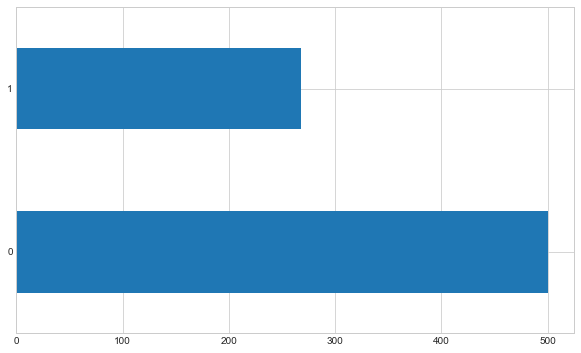

In [9]:
df.Outcome.value_counts().plot.barh()

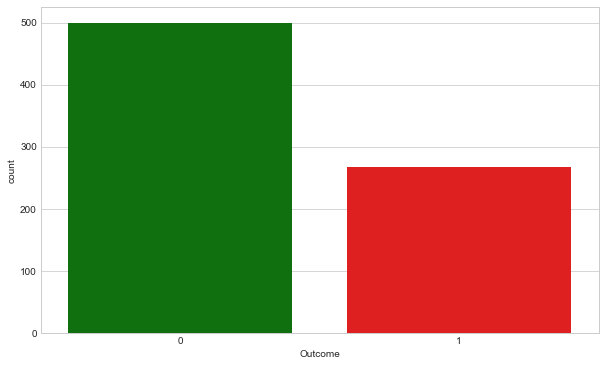

In [10]:
colors = ["green", "red"]
sns.countplot(df.Outcome, palette= colors)
plt.show()

In [11]:
def bar_plot(variable):
    # get feature
    var = df[variable]
    # count number of categorical variable
    varValue = var.value_counts()
   
    # visualize
    plt.figure(figsize= (9, 3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    
    # print("{}: \n{}".format(variable, varValue))
    
    

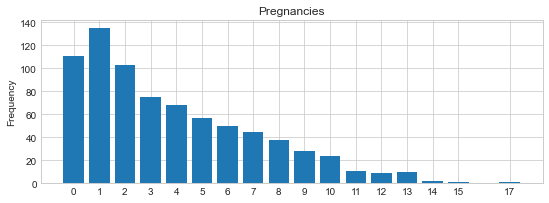

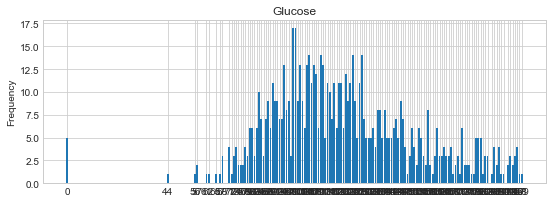

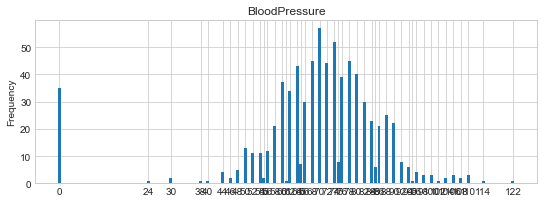

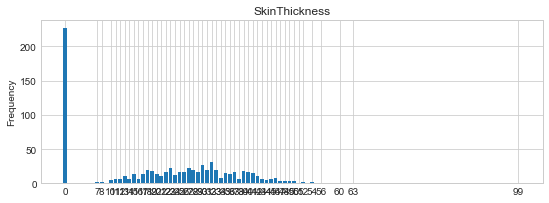

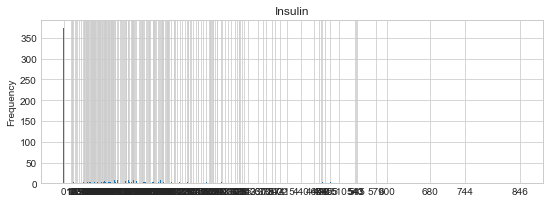

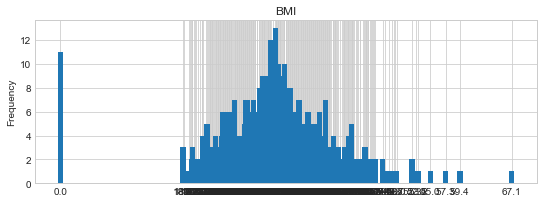

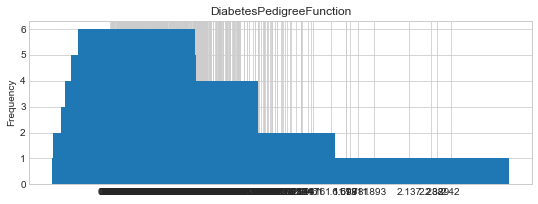

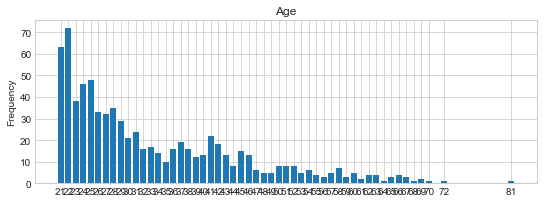

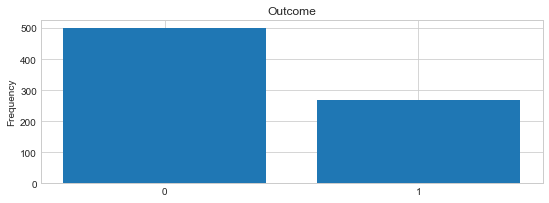

In [12]:
category1 = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', "Outcome"]
for c in category1:
    bar_plot(c)

In [13]:
def plot_hist(variable):
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

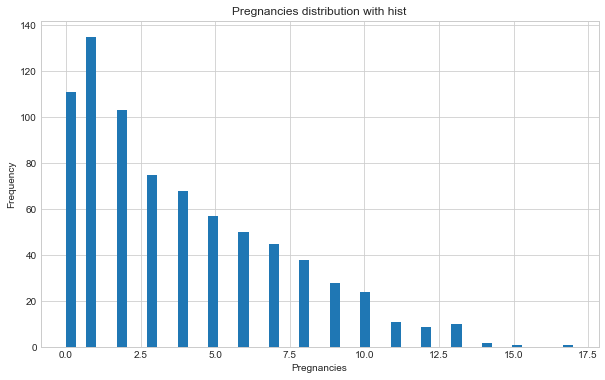

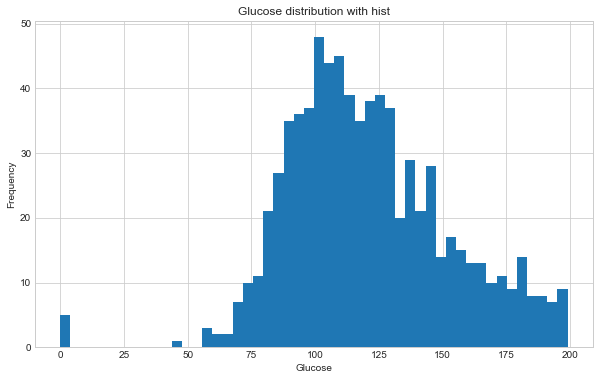

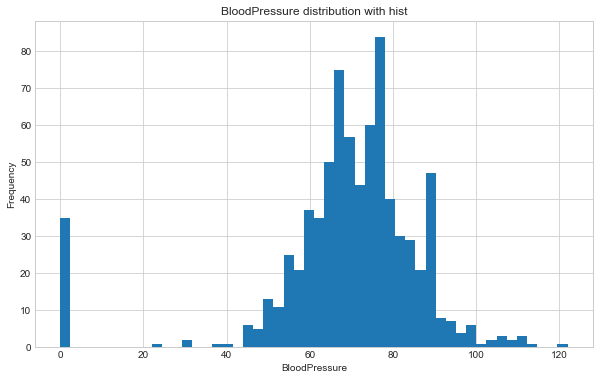

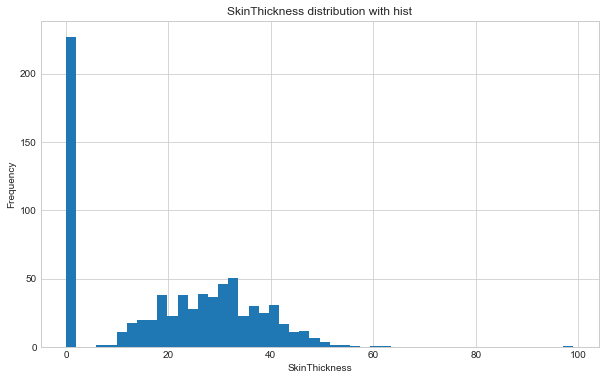

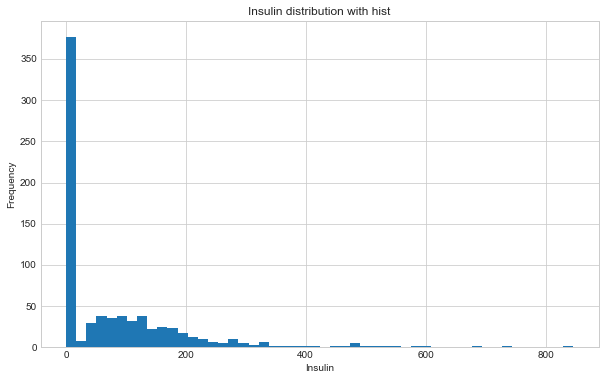

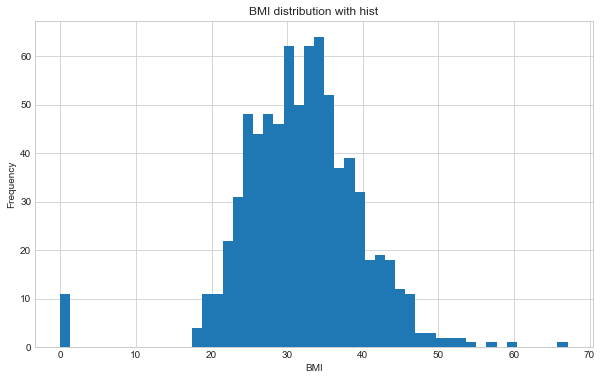

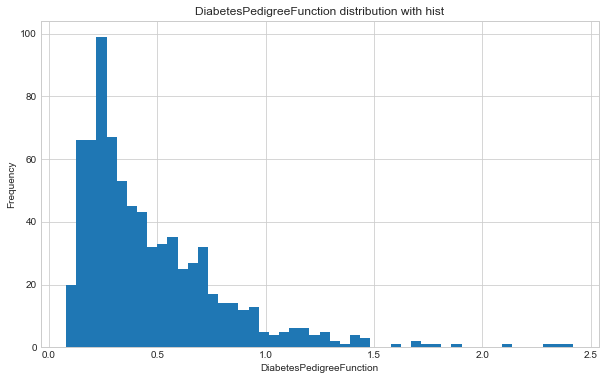

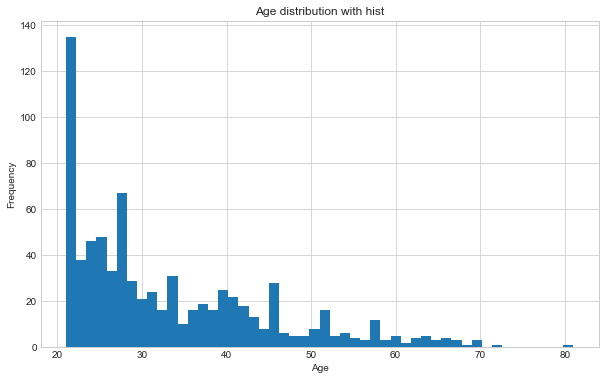

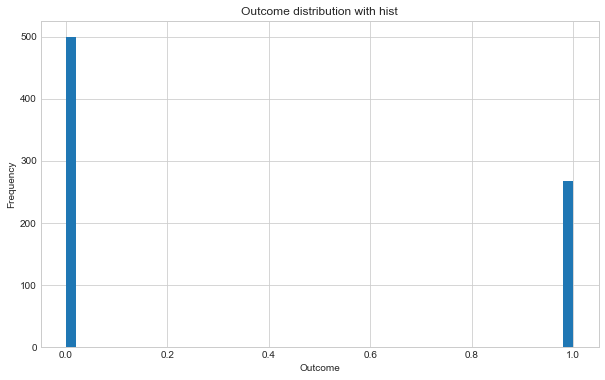

In [14]:
numericVar = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', "Outcome"]
for n in numericVar:
    plot_hist(n)

### Outlier Detection

In [15]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [16]:
def detect_outliers(df, features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile Q1
        Q1 = np.percentile(df[c], 25)
        # Q1 = df[c].quantile(0.25)
        # 3st quartile Q3
        Q3 = np.percentile(df[c], 75)
        # Q3 = df[c].quantile(0.75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)
    
    return multiple_outliers

In [17]:
df.loc[detect_outliers(df, ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
49,7,105,0,0,0,0.000,0.305,24,0
60,2,84,0,0,0,0.000,0.304,21,0
81,2,74,0,0,0,0.000,0.102,22,0
125,1,88,30,42,99,55.000,0.496,26,1
177,0,129,110,46,130,67.100,0.319,26,1
193,11,135,0,0,0,52.300,0.578,40,1
426,0,94,0,0,0,0.000,0.256,25,0
453,2,119,0,0,0,19.600,0.832,72,0
494,3,80,0,0,0,0.000,0.174,22,0
522,6,114,0,0,0,0.000,0.189,26,0


In [18]:
# Featureslarda 1 den fazla Outlier mevcut değil.
# Features do not have outlier values more than one

### Missing Values

In [19]:
df.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [20]:
# Features do not have missing values.

# Visualizations

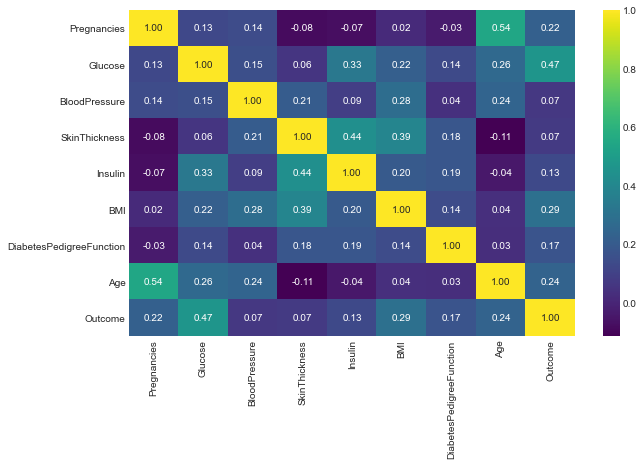

In [21]:
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "viridis");

In [22]:
corr = df.corr().Outcome
corr[np.argsort(corr, axis= 0)[:-1]]

BloodPressure              0.065
SkinThickness              0.075
Insulin                    0.131
DiabetesPedigreeFunction   0.174
Pregnancies                0.222
Age                        0.238
BMI                        0.293
Glucose                    0.467
Name: Outcome, dtype: float64

<AxesSubplot:>

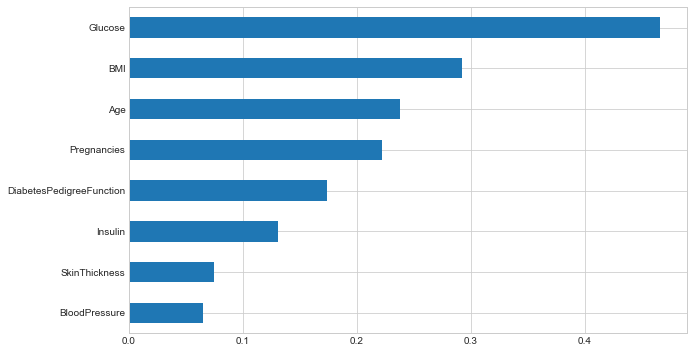

In [23]:
df.corr()['Outcome'].drop('Outcome').sort_values().plot.barh()

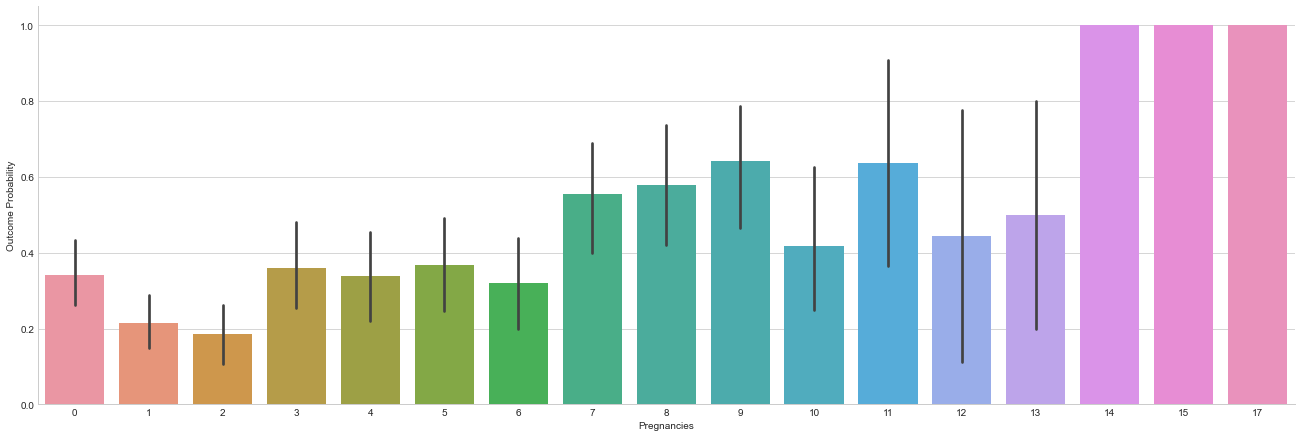

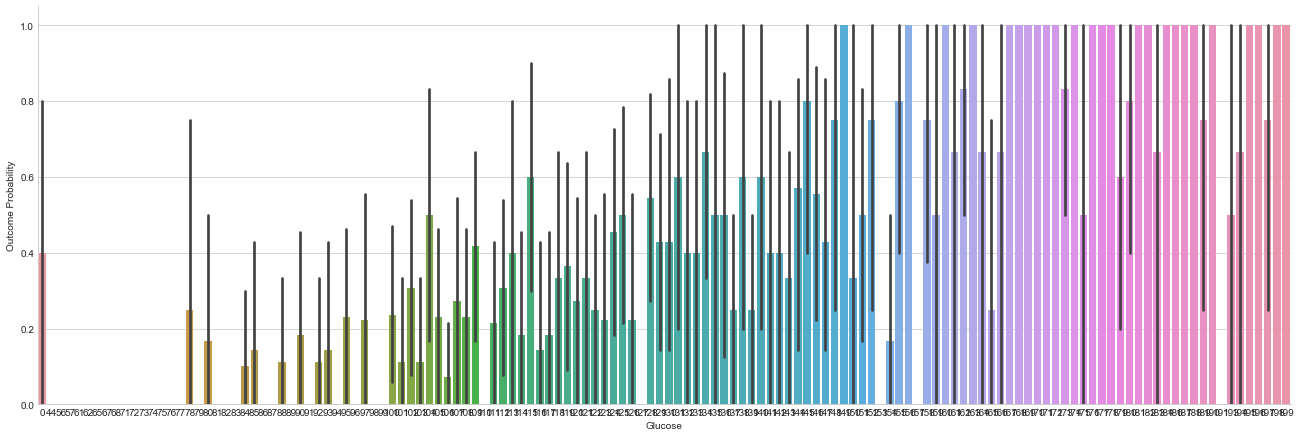

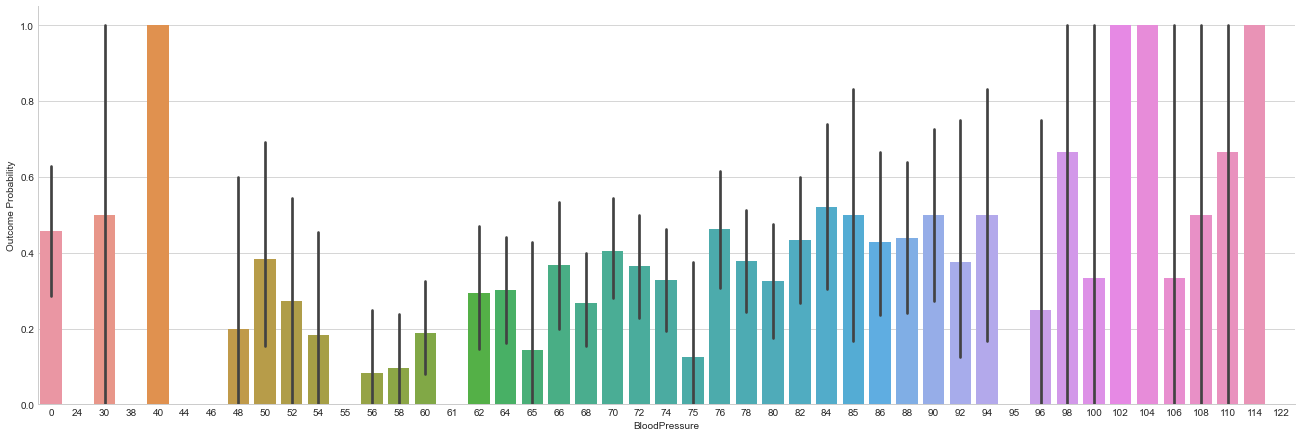

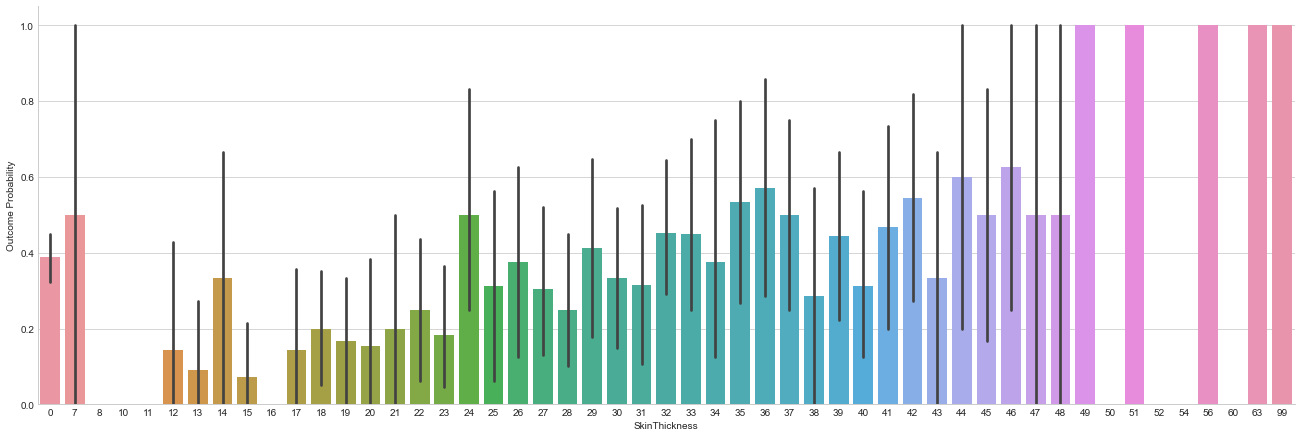

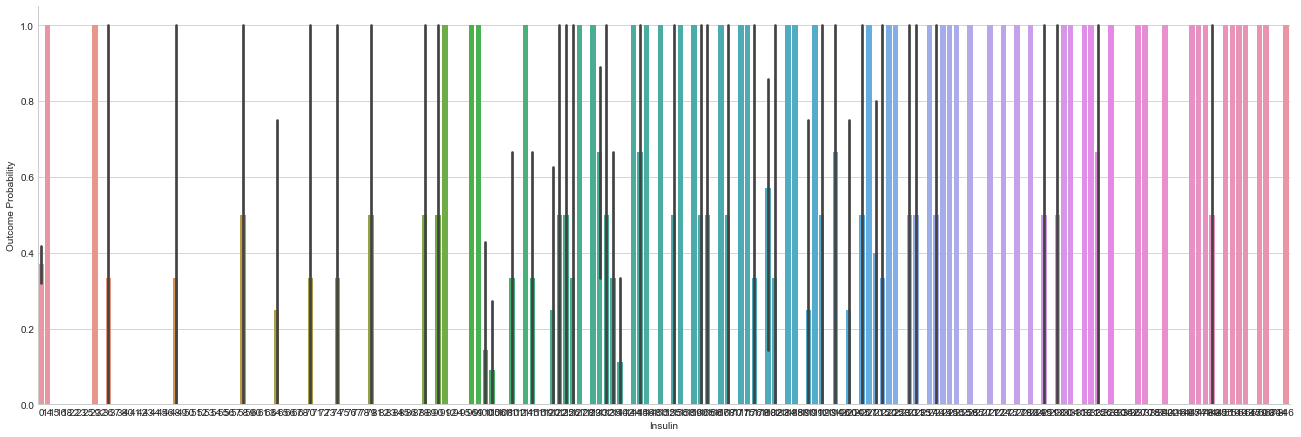

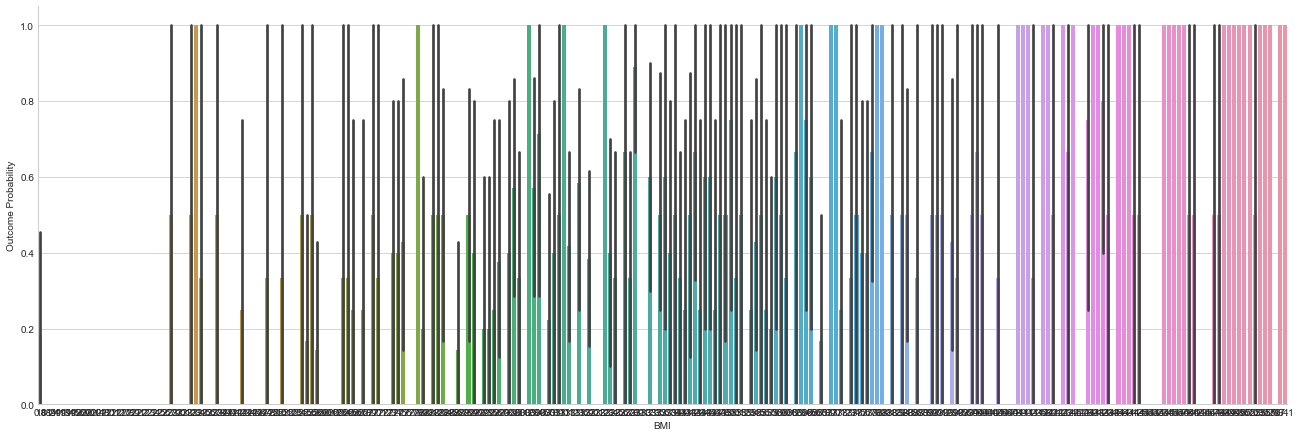

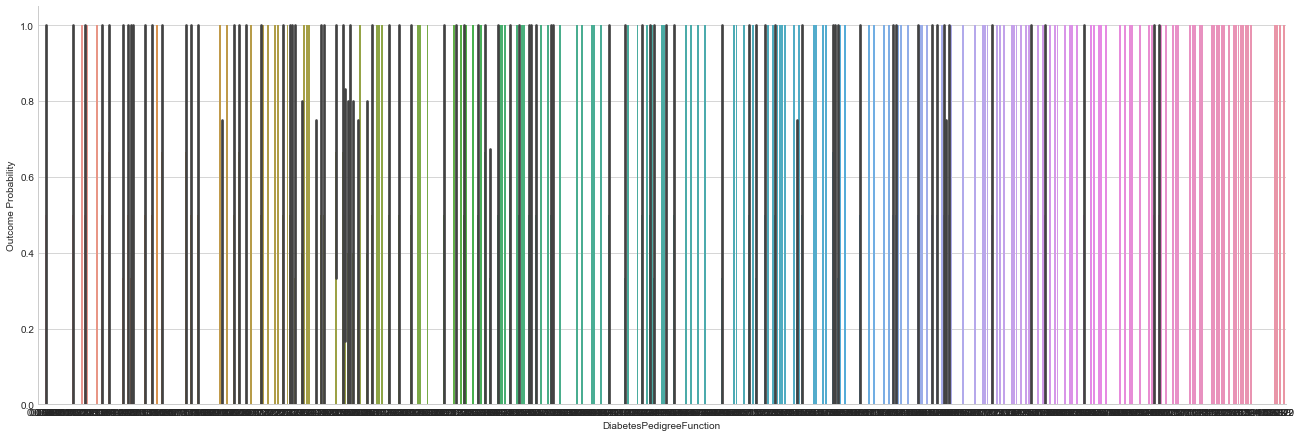

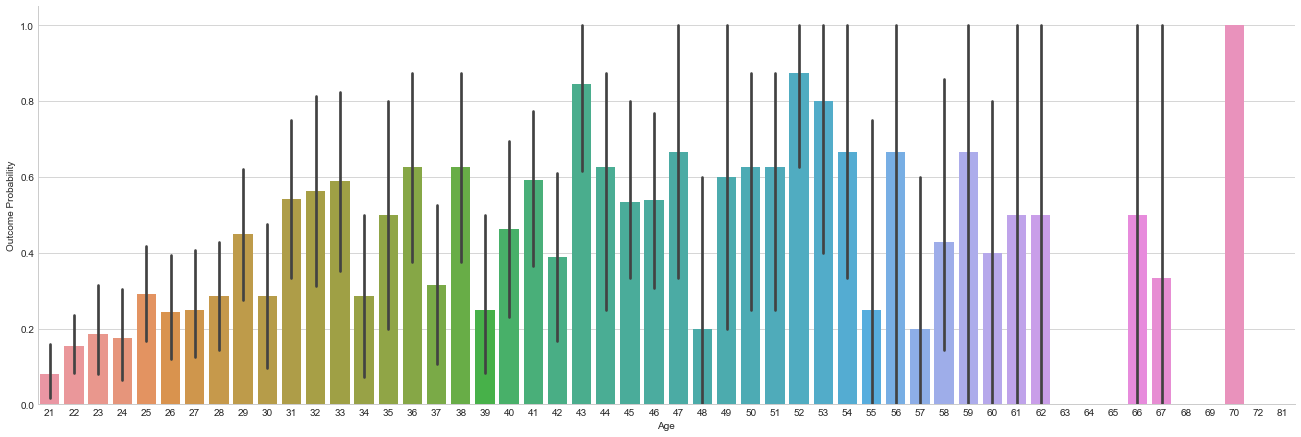

In [24]:
for i in df.drop("Outcome", axis = 1).columns:
    g = sns.factorplot( x = i, y = "Outcome", data = df, kind = "bar", size = 6, aspect=3)
    g.set_ylabels("Outcome Probability")
    plt.show()

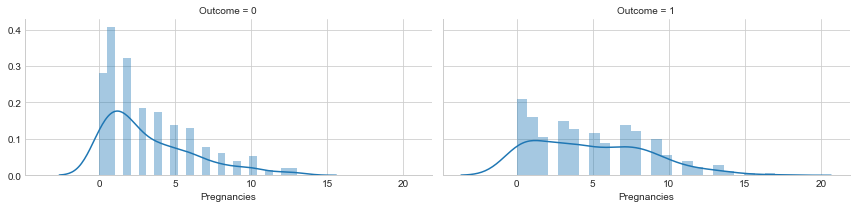

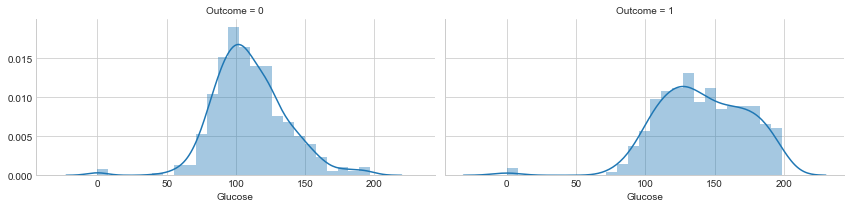

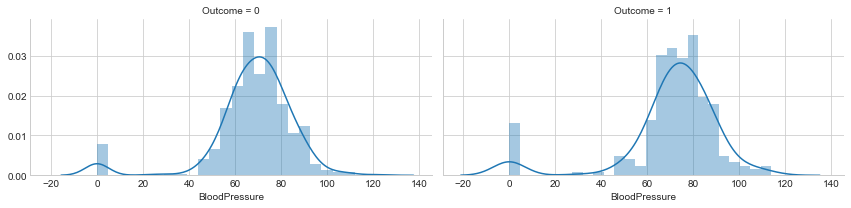

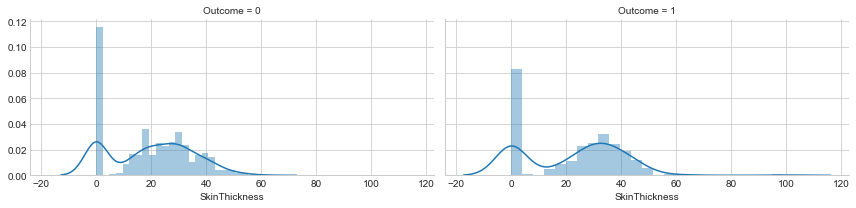

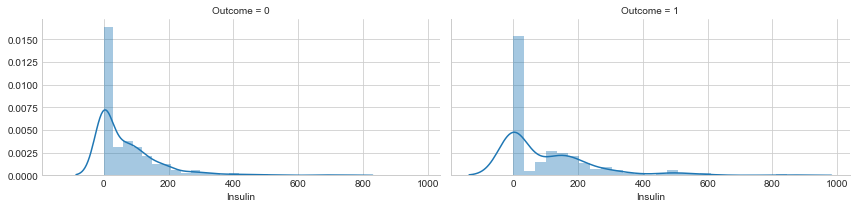

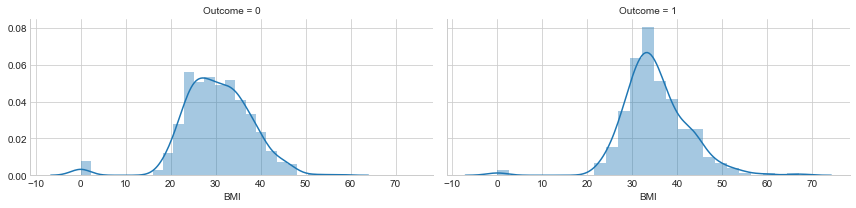

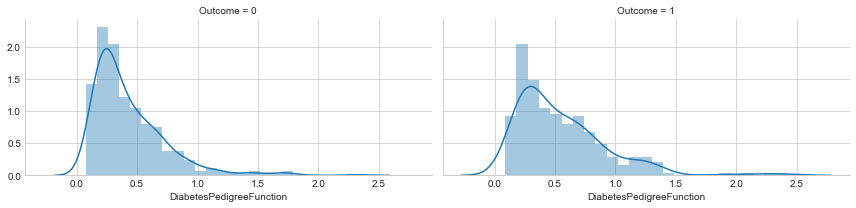

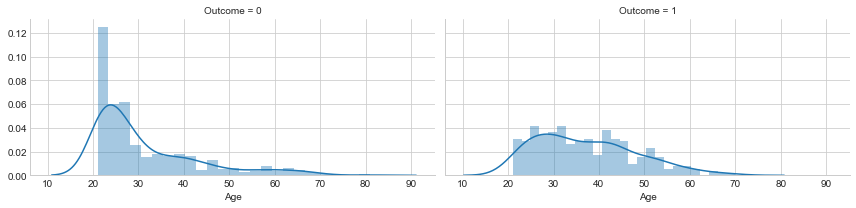

In [25]:
for i in df.drop("Outcome", axis = 1).columns:
    g = sns.FacetGrid(df, col = "Outcome", size = 3, aspect=2)
    g.map(sns.distplot, i, bins= 25)
    plt.show()

# Statistical Analysis

In [26]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


In [27]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

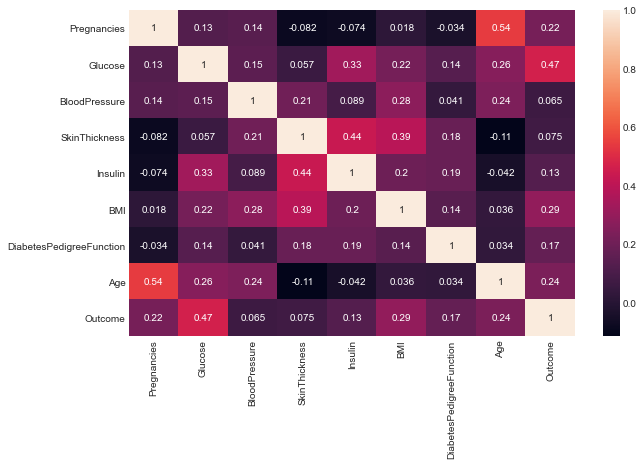

In [28]:
sns.heatmap(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr(), annot= True)
plt.show()

In [29]:
corr = df.corr().Outcome
corr[np.argsort(corr, axis= 0)[:-1]]

BloodPressure              0.065
SkinThickness              0.075
Insulin                    0.131
DiabetesPedigreeFunction   0.174
Pregnancies                0.222
Age                        0.238
BMI                        0.293
Glucose                    0.467
Name: Outcome, dtype: float64

# Determine Dependent and Independent Variables

In [30]:
X = df.drop("Outcome", axis = 1)
y = df.Outcome

# Scaling the Data

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

# Train - Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [33]:
print("X_train: {}\nX_test: {}\ny_train: {}\ny_test: {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train: (614, 8)
X_test: (154, 8)
y_train: (614,)
y_test: (154,)


# 1- Logistic Reggression

## Model Fitting and Compare Actual and Predicted Labels

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
log_model = LogisticRegression()

In [36]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [37]:
log_model.coef_

array([[ 0.21621911,  1.06930435, -0.2587175 ,  0.0472661 , -0.19919621,
         0.7920862 ,  0.22695841,  0.43005814]])

In [38]:
log_model.intercept_

array([-0.85571126])

In [39]:
y_pred = log_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [40]:
y_train_pred = log_model.predict(X_train)
y_train_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [41]:
y_pred_proba = log_model.predict_proba(X_test)

In [42]:
y_pred_proba

array([[0.72280754, 0.27719246],
       [0.81395135, 0.18604865],
       [0.88526434, 0.11473566],
       [0.82844032, 0.17155968],
       [0.53159622, 0.46840378],
       [0.56042732, 0.43957268],
       [0.98378746, 0.01621254],
       [0.34090049, 0.65909951],
       [0.4638661 , 0.5361339 ],
       [0.22969263, 0.77030737],
       [0.74602441, 0.25397559],
       [0.10868846, 0.89131154],
       [0.66715323, 0.33284677],
       [0.68715992, 0.31284008],
       [0.91457709, 0.08542291],
       [0.61371718, 0.38628282],
       [0.8605778 , 0.1394222 ],
       [0.92340286, 0.07659714],
       [0.14236747, 0.85763253],
       [0.44490556, 0.55509444],
       [0.79162171, 0.20837829],
       [0.92087114, 0.07912886],
       [0.46898051, 0.53101949],
       [0.9045137 , 0.0954863 ],
       [0.46512723, 0.53487277],
       [0.12015703, 0.87984297],
       [0.87544875, 0.12455125],
       [0.96889985, 0.03110015],
       [0.75201313, 0.24798687],
       [0.88048066, 0.11951934],
       [0.

In [43]:
pd.DataFrame(y_pred_proba).sample(10)

,0,1
75,0.485,0.515
146,0.850,0.150
56,0.229,0.771
107,0.263,0.737
52,0.191,0.809
7,0.341,0.659
31,0.133,0.867
121,0.702,0.298
119,0.428,0.572
111,0.682,0.318


In [44]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Pred_proba": y_pred_proba[:,1]}

In [45]:
pd.DataFrame.from_dict(my_dict).sample(20)

,Actual,Pred,Pred_proba
361,0,1,0.771
314,1,1,0.543
754,1,1,0.736
725,0,0,0.423
133,0,0,0.292
544,0,0,0.079
31,1,1,0.507
2,1,1,0.701
328,1,0,0.248
309,1,0,0.310


## Error Metrics

In [49]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [50]:
metrics=[precision_score, recall_score, accuracy_score, f1_score]
for i in metrics:
    print(f"Training {i}:",i(y_train, y_train_pred))
    print(f" Testing {i}:",i(y_test, y_pred))

Training <function precision_score at 0x000001C5CF0C4160>: 0.7168674698795181
 Testing <function precision_score at 0x000001C5CF0C4160>: 0.6491228070175439
Training <function recall_score at 0x000001C5CF0C4280>: 0.5586854460093896
 Testing <function recall_score at 0x000001C5CF0C4280>: 0.6727272727272727
Training <function accuracy_score at 0x000001C5CF0DF430>: 0.7703583061889251
 Testing <function accuracy_score at 0x000001C5CF0DF430>: 0.7532467532467533
Training <function f1_score at 0x000001C5CF0DFC10>: 0.6279683377308708
 Testing <function f1_score at 0x000001C5CF0DFC10>: 0.6607142857142858


In [48]:
accuracy_score(y_test, y_pred)

0.7532467532467533

In [51]:
accuracy_score(y_train, y_train_pred)

0.7703583061889251

In [52]:
precision_score(y_test, y_pred)

0.6491228070175439

In [53]:
precision_score(y_train, y_train_pred)

0.7168674698795181

In [54]:
recall_score(y_test, y_pred)

0.6727272727272727

In [55]:
recall_score(y_train, y_train_pred)

0.5586854460093896

In [56]:
f1_score(y_test, y_pred, average = "weighted")

0.7541909620991254

In [57]:
f1_score(y_train, y_train_pred, average = "weighted")

0.762475704872637

In [58]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [59]:
print(confusion_matrix(y_test, y_pred))

[[79 20]
 [18 37]]


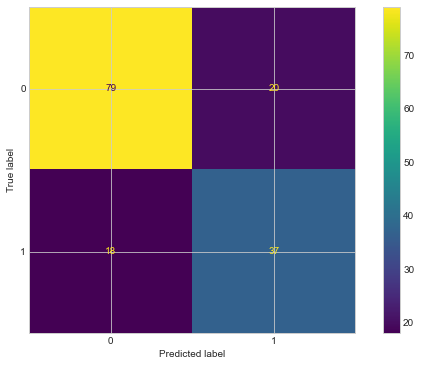

In [60]:
plot_confusion_matrix(log_model, X_test, y_test);

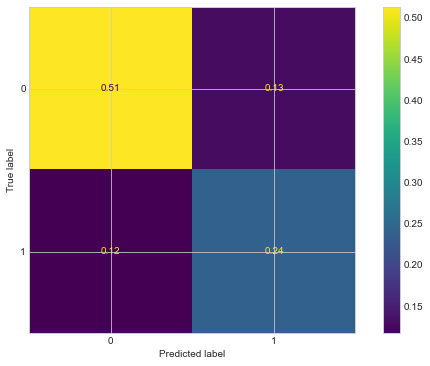

In [61]:
plot_confusion_matrix(log_model, X_test, y_test, normalize= "all");

In [62]:
f1_score(y_test, y_pred, average = "weighted")

0.7541909620991254

In [63]:
f1_score(y_train, y_train_pred, average = "weighted")

0.762475704872637

In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [66]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       401
           1       0.72      0.56      0.63       213

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614



## Evaluate Model

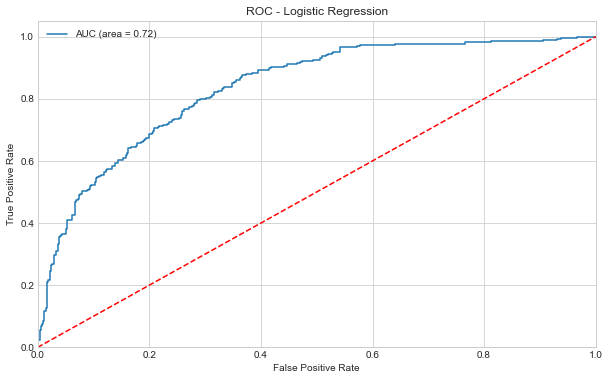

In [68]:
from sklearn.metrics import roc_auc_score,roc_curve

logit_roc_auc = roc_auc_score(y, log_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, log_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC - Logistic Regression')
plt.show()

# Improve Model 
    * Use Cross Validate
    * Use Grid-Search

## Cross Validate

In [69]:
from sklearn.model_selection import cross_val_score, cross_validate

In [70]:
model = LogisticRegression()

In [71]:
scores = cross_val_score(model, X_train, y_train, cv= 10)
print("Cross- validation mean of accuracy scores", scores.mean())
print("")
print(scores)

Cross- validation mean of accuracy scores 0.7654151242728715

[0.74193548 0.75806452 0.83870968 0.75806452 0.72131148 0.80327869
 0.73770492 0.70491803 0.80327869 0.78688525]


In [72]:
scores = cross_val_score(model, X_test, y_test, cv= 10)
print("Cross- validation mean of accuracy scores", scores.mean())
print("")
print(scores)

Cross- validation mean of accuracy scores 0.7737499999999999

[0.6875     0.6875     0.75       0.8125     0.73333333 0.86666667
 0.8        0.73333333 0.93333333 0.73333333]


In [73]:
model = LogisticRegression()

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_weighted", "recall_weighted", 
                                                               "f1_weighted"], cv = 10)
df_scores = pd.DataFrame(scores, index= range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
1,0.014,0.010,0.742,0.742,0.742,0.742
2,0.008,0.008,0.758,0.753,0.758,0.754
3,0.008,0.008,0.839,0.843,0.839,0.832
4,0.010,0.010,0.758,0.752,0.758,0.750
5,0.010,0.004,0.721,0.711,0.721,0.711
6,0.007,0.005,0.803,0.800,0.803,0.798
7,0.005,0.006,0.738,0.736,0.738,0.711
8,0.006,0.004,0.705,0.699,0.705,0.701
9,0.007,0.005,0.803,0.803,0.803,0.794
10,0.006,0.005,0.787,0.782,0.787,0.783


In [74]:
df_scores.mean()[2:]

test_accuracy             0.765
test_precision_weighted   0.762
test_recall_weighted      0.765
test_f1_weighted          0.757
dtype: float64

In [75]:
model = LogisticRegression()

scores = cross_validate(model, X_test, y_test, scoring = ["accuracy", "precision_weighted", "recall_weighted", 
                                                               "f1_weighted"], cv = 10)
df_scores = pd.DataFrame(scores, index= range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
1,0.011,0.009,0.688,0.683,0.688,0.656
2,0.010,0.008,0.688,0.700,0.688,0.691
3,0.007,0.005,0.750,0.821,0.750,0.708
4,0.005,0.006,0.812,0.823,0.812,0.815
5,0.006,0.006,0.733,0.722,0.733,0.712
6,0.006,0.005,0.867,0.889,0.867,0.856
7,0.006,0.005,0.800,0.815,0.800,0.804
8,0.006,0.005,0.733,0.733,0.733,0.733
9,0.005,0.005,0.933,0.944,0.933,0.935
10,0.006,0.009,0.733,0.736,0.733,0.720


In [76]:
df_scores.mean()[2:]

test_accuracy             0.774
test_precision_weighted   0.787
test_recall_weighted      0.774
test_f1_weighted          0.763
dtype: float64

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [78]:
from sklearn.metrics import classification_report

In [79]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       401
           1       0.72      0.56      0.63       213

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614



## Grid-Search

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
np.power(10.0, np.arange(-10, 10))

array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09])

In [82]:
param_grid = {"C": np.power(10.0, np.arange(-10, 10)), 
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'penalty': ['l1','l2'],
                       
             }


In [83]:
model_grid= LogisticRegression(penalty='l2', random_state=777, max_iter=10000, tol=10)

In [84]:
log_grid_model = GridSearchCV(model_grid, param_grid, scoring='roc_auc', cv=10)

In [85]:
log_grid_model.fit(X, y)   

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=10000, random_state=777,
                                          tol=10),
             param_grid={'C': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='roc_auc')

In [86]:
print ('log_grid_model.best_score_:', log_grid_model.best_score_)
print ('log_grid_model.best_params_:', log_grid_model.best_params_)

log_grid_model.best_score_: 0.83202849002849
log_grid_model.best_params_: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [87]:
y_grid_pred = log_grid_model.predict(X_test)

In [88]:
print(classification_report(y_test, y_grid_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        99
           1       0.72      0.65      0.69        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154



In [89]:
y_grid_train_pred = log_grid_model.predict(X_train)

In [90]:
print(classification_report(y_train, y_grid_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       401
           1       0.74      0.55      0.63       213

    accuracy                           0.78       614
   macro avg       0.76      0.72      0.74       614
weighted avg       0.77      0.78      0.77       614



# 2- KNN 

## Modeling

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
knn_model = KNeighborsClassifier(n_neighbors = 3) # DEFAULT n_neighbors=5

In [93]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [95]:
knn_model.n_neighbors 

3

In [97]:
# mesafe ölçmek için öklid metodunu kullanıyor. 
# It uses the Euclidean method to measure distance.
knn_model.effective_metric_ 

'euclidean'

In [98]:
y_pred = knn_model.predict(X_test)

In [99]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [100]:
y_pred_proba = knn_model.predict_proba(X_test)

In [101]:
y_pred_proba

array([[0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.

In [102]:
pd.DataFrame(y_pred_proba).sample(10)

,0,1
30,0.000,1.000
5,1.000,0.000
55,1.000,0.000
80,0.667,0.333
57,1.000,0.000
26,0.667,0.333
12,0.667,0.333
61,0.667,0.333
102,0.667,0.333
131,0.000,1.000


In [103]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Pred_proba": y_pred_proba[:,1]}

In [104]:
pd.DataFrame.from_dict(my_dict).sample(20)

,Actual,Pred,Pred_proba
181,0,0,0.333
382,0,0,0.000
118,0,0,0.000
2,1,1,0.667
728,0,0,0.333
690,0,1,0.667
716,1,1,0.667
513,0,0,0.000
133,0,0,0.333
375,1,1,1.000


## Model Performance on Classification Tasks

In [105]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

In [106]:
print(confusion_matrix(y_test, y_pred))

[[80 19]
 [27 28]]


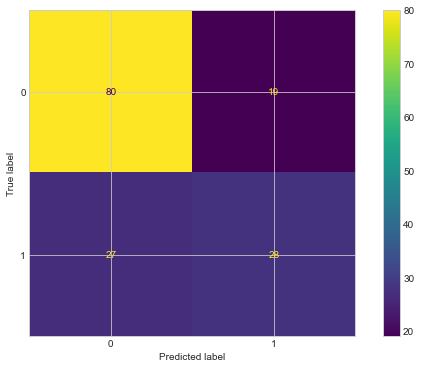

In [107]:
plot_confusion_matrix(knn_model, X_test, y_test);

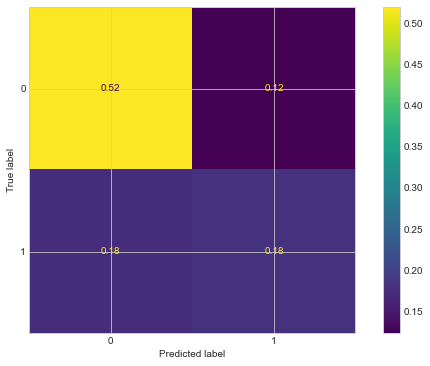

In [108]:
plot_confusion_matrix(knn_model, X_test, y_test, normalize= "all")

In [109]:
accuracy_score(y_test, y_pred)

0.7012987012987013

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78        99
           1       0.60      0.51      0.55        55

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



In [111]:
y_train_pred = knn_model.predict(X_train)

In [112]:
accuracy_score(y_train, y_train_pred)

0.8615635179153095

In [113]:

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       401
           1       0.84      0.74      0.79       213

    accuracy                           0.86       614
   macro avg       0.86      0.83      0.84       614
weighted avg       0.86      0.86      0.86       614



## Elbow Method for Choosing Reasonable K Values

In [114]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [115]:
test_error_rates = []
for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors= k)
    knn_model.fit(X_train, y_train)
    
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error)


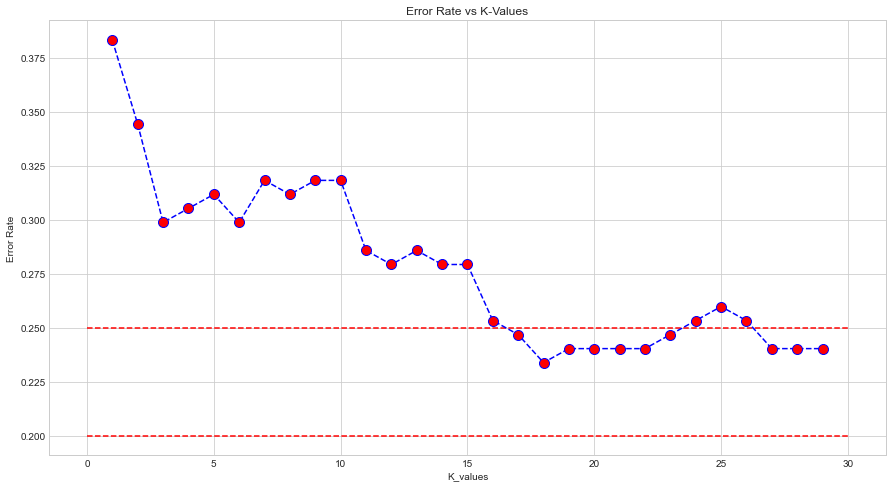

In [116]:
plt.figure(figsize = (15, 8))
plt.plot(range(1, 30), test_error_rates, color = "blue", linestyle = "--", marker = "o",
         markerfacecolor= "red", markersize= 10)
plt.title("Error Rate vs K-Values")
plt.xlabel("K_values")
plt.ylabel("Error Rate")
plt.hlines(y= 0.20, xmin= 0, xmax= 30,colors = "r", linestyles= "--")
plt.hlines(y= 0.25, xmin= 0, xmax= 30,colors = "r", linestyles= "--")
plt.show()

In [117]:
ter = pd.DataFrame(test_error_rates, columns = ["test_error_rates"]).sort_values(by='test_error_rates', ascending=True)
ter

,test_error_rates
17,0.234
28,0.240
26,0.240
21,0.240
20,0.240
19,0.240
18,0.240
27,0.240
22,0.247
16,0.247


## Scores by Various K Values

In [118]:
# k = 1
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print("With K = 1")
print("\n")
print(confusion_matrix(y_test, pred))
print("\n")
print(classification_report(y_test, pred))

With K = 1


[[70 29]
 [30 25]]


              precision    recall  f1-score   support

           0       0.70      0.71      0.70        99
           1       0.46      0.45      0.46        55

    accuracy                           0.62       154
   macro avg       0.58      0.58      0.58       154
weighted avg       0.62      0.62      0.62       154



In [119]:
# k = 17
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print("With K = 17")
print("\n")
print(confusion_matrix(y_test, pred))
print("\n")
print(classification_report(y_test, pred))

With K = 17


[[85 14]
 [24 31]]


              precision    recall  f1-score   support

           0       0.78      0.86      0.82        99
           1       0.69      0.56      0.62        55

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



## Cross Validate For Optimal K Value

In [120]:
from sklearn.model_selection import cross_val_score, cross_validate

In [121]:
model = KNeighborsClassifier(n_neighbors= 17)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.005,0.021,0.677,0.529,0.429,0.474
2,0.004,0.016,0.677,0.556,0.455,0.500
3,0.003,0.021,0.806,0.857,0.545,0.667
4,0.003,0.011,0.774,0.833,0.455,0.588
5,0.003,0.012,0.721,0.625,0.476,0.541
6,0.002,0.010,0.721,0.611,0.524,0.564
7,0.003,0.011,0.770,0.818,0.429,0.562
8,0.003,0.011,0.787,0.722,0.619,0.667
9,0.002,0.011,0.803,0.765,0.619,0.684
10,0.003,0.012,0.705,0.636,0.333,0.437


In [122]:
df_scores.mean()[2:]

test_accuracy    0.744
test_precision   0.695
test_recall      0.488
test_f1          0.568
dtype: float64

## Gridseach Method for Choosing Reasonable K Values

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
knn_grid = KNeighborsClassifier()

In [125]:
k_values = range(1, 30)

In [126]:
param_grid = {"n_neighbors": k_values, "weights": ["uniform", "distance"]}

In [127]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv= 10, scoring = "accuracy")

In [128]:
knn_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [129]:
knn_grid_model.best_estimator_

KNeighborsClassifier(n_neighbors=29)

In [130]:
print("The best skore:" + str(knn_grid_model.best_score_))
print("The best paramaters: " + str(knn_grid_model.best_params_))

The best skore:0.7719989423585405
The best paramaters: {'n_neighbors': 29, 'weights': 'uniform'}


In [131]:
list(knn_grid_model.best_params_.values())[0]

29

In [132]:
list(knn_grid_model.best_params_.values())[1]

'uniform'

In [133]:
# With k = 29
knn = KNeighborsClassifier(n_neighbors= list(knn_grid_model.best_params_.values())[0], 
                           weights = list(knn_grid_model.best_params_.values())[1] )

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(f"With K = {list(knn_grid_model.best_params_.values())[0]}")
print("\n")
print(confusion_matrix(y_test, pred))
print("\n")
print(classification_report(y_test, pred))

With K = 29


[[88 11]
 [26 29]]


              precision    recall  f1-score   support

           0       0.77      0.89      0.83        99
           1       0.72      0.53      0.61        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.76      0.75       154



In [134]:
knn = KNeighborsClassifier(n_neighbors= list(knn_grid_model.best_params_.values())[0])

knn.fit(X_train, y_train)
pred = knn.predict(X_train)

print(f"With K = {list(knn_grid_model.best_params_.values())[0]}")
print("\n")
print(confusion_matrix(y_train, pred))
print("\n")
print(classification_report(y_train, pred))

With K = 29


[[367  34]
 [103 110]]


              precision    recall  f1-score   support

           0       0.78      0.92      0.84       401
           1       0.76      0.52      0.62       213

    accuracy                           0.78       614
   macro avg       0.77      0.72      0.73       614
weighted avg       0.77      0.78      0.76       614



## Evaluate Model

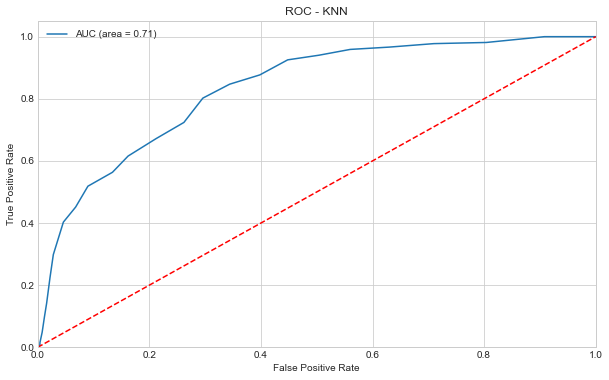

In [135]:
from sklearn.metrics import roc_auc_score,roc_curve

knn_roc_auc = roc_auc_score(y, knn.predict(X))

fpr, tpr, thresholds = roc_curve(y, knn_grid_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC - KNN')
plt.show()

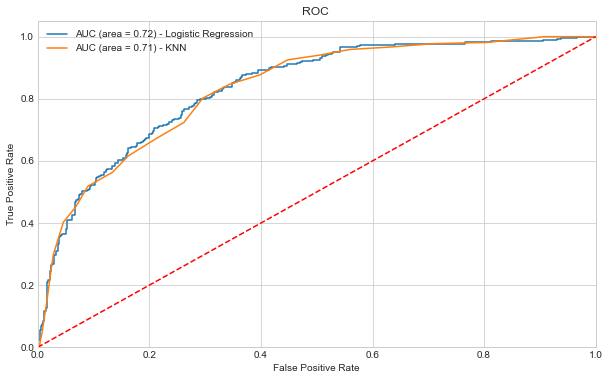

In [136]:
from sklearn.metrics import roc_auc_score,roc_curve

logit_roc_auc = roc_auc_score(y, log_model.predict(X))
knn_roc_auc = roc_auc_score(y, knn.predict(X))

fpr_log, tpr_log, thresholds = roc_curve(y, log_model.predict_proba(X)[:,1])
fpr_knn, tpr_knn, thresholds = roc_curve(y, knn_grid_model.predict_proba(X)[:,1])

plt.figure()
plt.plot(fpr_log, tpr_log, label='AUC (area = %0.2f) - Logistic Regression' % logit_roc_auc)
plt.plot(fpr_knn, tpr_knn, label='AUC (area = %0.2f) - KNN' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC ')
plt.show()

In [137]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

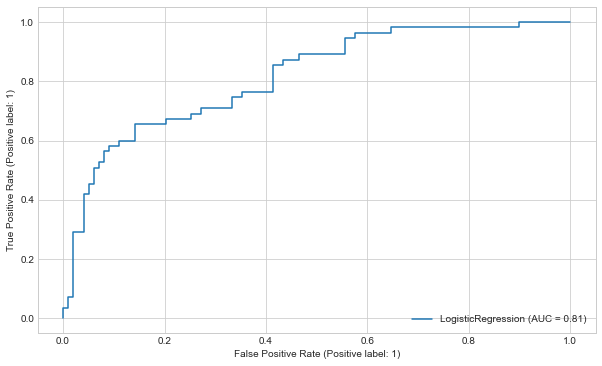

In [138]:
plot_roc_curve(log_model, X_test, y_test)

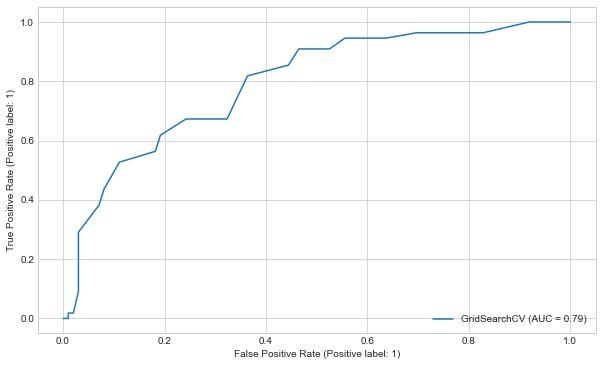

In [139]:
plot_roc_curve(knn_grid_model, X_test, y_test)